In [1]:
#initialisation code
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
import pandas as pda
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('crimeInNYC').getOrCreate()

In [2]:
#Importing the dataset
df = pda.read_csv('Datasets/nyc-park-crime-2016.csv')

In [3]:
#showing the data set
df.head()

,PARK,BOROUGH,QUARTER,SIZE (ACRES),CATEGORY,MURDER,RAPE,ROBBERY,FELONY ASSAULT,BURGLARY,GRAND LARCENY,GRAND LARCENY OF MOTOR VEHICLE,TOTAL
0,PELHAM BAY PARK,BRONX,1,2771.747,ONE ACRE OR LARGER,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2
1,VAN CORTLANDT PARK,BRONX,1,1146.430,ONE ACRE OR LARGER,0.0,0.0,2.0,1.0,0.0,0.0,0.0,3
2,ROCKAWAY BEACH AND BOARDWALK,QUEENS,1,1072.564,ONE ACRE OR LARGER,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,FRESHKILLS PARK,STATEN ISLAND,1,913.320,ONE ACRE OR LARGER,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,FLUSHING MEADOWS CORONA PARK,QUEENS,1,897.690,ONE ACRE OR LARGER,0.0,0.0,0.0,0.0,1.0,2.0,2.0,5


In [5]:
# Print schema allows us to visualise the data structure at a high level. 
df.head()

,PARK,BOROUGH,QUARTER,SIZE (ACRES),CATEGORY,MURDER,RAPE,ROBBERY,FELONY ASSAULT,BURGLARY,GRAND LARCENY,GRAND LARCENY OF MOTOR VEHICLE,TOTAL
0,PELHAM BAY PARK,BRONX,1,2771.747,ONE ACRE OR LARGER,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2
1,VAN CORTLANDT PARK,BRONX,1,1146.430,ONE ACRE OR LARGER,0.0,0.0,2.0,1.0,0.0,0.0,0.0,3
2,ROCKAWAY BEACH AND BOARDWALK,QUEENS,1,1072.564,ONE ACRE OR LARGER,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,FRESHKILLS PARK,STATEN ISLAND,1,913.320,ONE ACRE OR LARGER,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,FLUSHING MEADOWS CORONA PARK,QUEENS,1,897.690,ONE ACRE OR LARGER,0.0,0.0,0.0,0.0,1.0,2.0,2.0,5


In [13]:
#Initial representation of the data in a schematic form
df.head()

Row(PARK='PELHAM BAY PARK', BOROUGH='BRONX', QUARTER=1, SIZE (ACRES)=2771.747, CATEGORY='ONE ACRE OR LARGER', MURDER=0, RAPE=1, ROBBERY=1, FELONY ASSAULT=0, BURGLARY=0, GRAND LARCENY=0, GRAND LARCENY OF MOTOR VEHICLE=0, TOTAL=2)

In [7]:
#Checking the number of null values
df.isnull().sum()

PARK                                0
BOROUGH                             0
QUARTER                             0
SIZE (ACRES)                        0
CATEGORY                            0
MURDER                             78
RAPE                               78
ROBBERY                           280
FELONY ASSAULT                    587
BURGLARY                          579
GRAND LARCENY                     354
GRAND LARCENY OF MOTOR VEHICLE    407
TOTAL                               0
dtype: int64

In [8]:
# Checking the data type of the attributes in the dataset
df.dtypes

PARK                               object
BOROUGH                            object
QUARTER                             int64
SIZE (ACRES)                      float64
CATEGORY                           object
MURDER                            float64
RAPE                              float64
ROBBERY                           float64
FELONY ASSAULT                    float64
BURGLARY                          float64
GRAND LARCENY                     float64
GRAND LARCENY OF MOTOR VEHICLE    float64
TOTAL                               int64
dtype: object

In [12]:
df.describe()

,QUARTER,SIZE (ACRES),MURDER,RAPE,ROBBERY,FELONY ASSAULT,BURGLARY,GRAND LARCENY,GRAND LARCENY OF MOTOR VEHICLE,TOTAL
count,4616.000000,4616.000000,4538.000000,4538.000000,4336.000000,4029.000000,4037.000000,4262.000000,4209.000000,4616.000000
mean,2.500000,24.998424,0.001983,0.004628,0.094327,0.050881,0.005697,0.123416,0.000950,0.259532
std,1.118155,123.286178,0.044494,0.071049,0.449123,0.307378,0.078497,0.898914,0.037749,1.341486
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.750000,0.917750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.500000,1.585500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.250000,4.947750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000,2771.750000,1.000000,2.000000,8.000000,6.000000,2.000000,30.000000,2.000000,43.000000


In [13]:
# number of records in the dataset
df.shape

(4616, 13)

In [16]:
#imputing null values in the dataset
df = df.fillna(0)

In [17]:
#Checking the number of null values in the data set
df.isnull().sum()

PARK                              0
BOROUGH                           0
QUARTER                           0
SIZE (ACRES)                      0
CATEGORY                          0
MURDER                            0
RAPE                              0
ROBBERY                           0
FELONY ASSAULT                    0
BURGLARY                          0
GRAND LARCENY                     0
GRAND LARCENY OF MOTOR VEHICLE    0
TOTAL                             0
dtype: int64

In [23]:
def crime_occured(total_crime_number):
    if total_crime_number > 0:
        return 1
    if total_crime_number == 0:
        return 0

In [24]:
df['CRIME OCCURED'] = df['TOTAL'].apply(crime_occured)

In [25]:
df.head()

,PARK,BOROUGH,QUARTER,SIZE (ACRES),CATEGORY,MURDER,RAPE,ROBBERY,FELONY ASSAULT,BURGLARY,GRAND LARCENY,GRAND LARCENY OF MOTOR VEHICLE,TOTAL,CRIME OCCURED
0,PELHAM BAY PARK,BRONX,1,2771.747,ONE ACRE OR LARGER,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2,1
1,VAN CORTLANDT PARK,BRONX,1,1146.430,ONE ACRE OR LARGER,0.0,0.0,2.0,1.0,0.0,0.0,0.0,3,1
2,ROCKAWAY BEACH AND BOARDWALK,QUEENS,1,1072.564,ONE ACRE OR LARGER,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3,FRESHKILLS PARK,STATEN ISLAND,1,913.320,ONE ACRE OR LARGER,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,FLUSHING MEADOWS CORONA PARK,QUEENS,1,897.690,ONE ACRE OR LARGER,0.0,0.0,0.0,0.0,1.0,2.0,2.0,5,1


In [30]:
df['VICIOUS CRIMES'] = df['MURDER'] + df['RAPE']

In [31]:
df.head()

,PARK,BOROUGH,QUARTER,SIZE (ACRES),CATEGORY,MURDER,RAPE,ROBBERY,FELONY ASSAULT,BURGLARY,GRAND LARCENY,GRAND LARCENY OF MOTOR VEHICLE,TOTAL,CRIME OCCURED,VICIOUS CRIMES
0,PELHAM BAY PARK,BRONX,1,2771.747,ONE ACRE OR LARGER,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2,1,1.0
1,VAN CORTLANDT PARK,BRONX,1,1146.430,ONE ACRE OR LARGER,0.0,0.0,2.0,1.0,0.0,0.0,0.0,3,1,0.0
2,ROCKAWAY BEACH AND BOARDWALK,QUEENS,1,1072.564,ONE ACRE OR LARGER,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0
3,FRESHKILLS PARK,STATEN ISLAND,1,913.320,ONE ACRE OR LARGER,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0
4,FLUSHING MEADOWS CORONA PARK,QUEENS,1,897.690,ONE ACRE OR LARGER,0.0,0.0,0.0,0.0,1.0,2.0,2.0,5,1,0.0


In [32]:
df.dtypes

PARK                               object
BOROUGH                            object
QUARTER                             int64
SIZE (ACRES)                      float64
CATEGORY                           object
MURDER                            float64
RAPE                              float64
ROBBERY                           float64
FELONY ASSAULT                    float64
BURGLARY                          float64
GRAND LARCENY                     float64
GRAND LARCENY OF MOTOR VEHICLE    float64
TOTAL                               int64
CRIME OCCURED                       int64
VICIOUS CRIMES                    float64
dtype: object

In [36]:
df.shape

(4616, 14)

In [37]:
df.head()

,PARK,BOROUGH,QUARTER,CATEGORY,MURDER,RAPE,ROBBERY,FELONY ASSAULT,BURGLARY,GRAND LARCENY,GRAND LARCENY OF MOTOR VEHICLE,TOTAL,CRIME OCCURED,VICIOUS CRIMES
0,PELHAM BAY PARK,BRONX,1,ONE ACRE OR LARGER,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2,1,1.0
1,VAN CORTLANDT PARK,BRONX,1,ONE ACRE OR LARGER,0.0,0.0,2.0,1.0,0.0,0.0,0.0,3,1,0.0
2,ROCKAWAY BEACH AND BOARDWALK,QUEENS,1,ONE ACRE OR LARGER,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0
3,FRESHKILLS PARK,STATEN ISLAND,1,ONE ACRE OR LARGER,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0
4,FLUSHING MEADOWS CORONA PARK,QUEENS,1,ONE ACRE OR LARGER,0.0,0.0,0.0,0.0,1.0,2.0,2.0,5,1,0.0


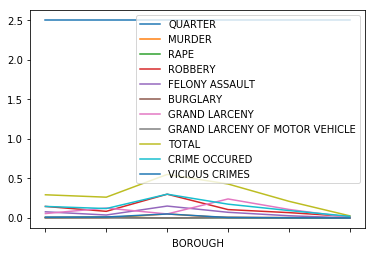

In [49]:
df.groupby('BOROUGH').mean().plot()

In [51]:
df.groupby('VICIOUS CRIMES').mean()

,QUARTER,MURDER,RAPE,ROBBERY,FELONY ASSAULT,BURGLARY,GRAND LARCENY,GRAND LARCENY OF MOTOR VEHICLE,TOTAL,CRIME OCCURED
VICIOUS CRIMES,,,,,,,,,,
0.0,2.496621,0.000000,0.000000,0.081099,0.042729,0.004360,0.101373,0.000872,0.230652,0.111402
1.0,3.071429,0.321429,0.678571,1.321429,0.321429,0.107143,1.964286,0.000000,4.714286,1.000000
2.0,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,6.000000,0.000000,8.000000,1.000000


In [53]:
df.to_csv('Datasets/good-nyc-park-crime-2016.csv')